## PROYECTO INDIVIDUAL 2, COVID-19

link archivo .csv: https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/g62h-syeh

link API: https://dev.socrata.com/foundry/healthdata.gov/g62h-syeh

    contra que consulto: https://healthdata.gov/resource/g62h-syeh.csv

como consultar contra la API: https://data.seattle.gov/resource/kzjm-xkqj.csv?$$app_token=APP_TOKEN

donde dice APP_TOKEN lo reemplazo por mi token y ya esta, ya deberia poder consultar


In [1]:
import requests #importo la libreria
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#agrego streamlit
import streamlit as st 

# al final no lo hice con API, no me salio :(

app_token = "J4v52FqAEfV6gT427WKkRkaPm"
secret_token = "OHD1Ex8XezTqj4PCF0xOo86b1I-Jh4mjf8lE"

url = "https://healthdata.gov/resource/g62h-syeh.csv"

url_consulta = url + "$$app_token=" + app_token

In [2]:
dicc = dict()

dicc["Host"] = "data.seattle.gov"
dicc["Accept"] = "application/csv"
dicc["X-App-Token"] = app_token

no estuve pudiendo levantar los datos de la API, seguimos con el .csv, mas adelante veo si puedo sacar de la API

In [3]:
data = pd.read_csv(r"C:\Users\franc\OneDrive\Documentos\Henry\proyectos\PI2_Franco_Perez_Alberio\data_covid_1.csv") #levanto el .csv

In [4]:
data.head() #muestro un poco

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
0,VT,2020/10/16,1,15,1,1,15,1,0.0,16,...,NaN,0,NaN,0,0.0,1,19.0,1,33.0,1
1,VI,2020/10/15,1,1,0,2,0,0,0.0,2,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2,PR,2020/10/14,9,49,7,9,49,7,0.0,64,...,NaN,0,NaN,0,0.0,1,4.0,1,15.0,1
3,VI,2020/10/13,1,1,0,2,0,0,0.0,2,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
4,AL,2020/10/10,33,79,2,35,77,2,13.0,112,...,NaN,0,NaN,0,0.0,8,0.0,8,0.0,8


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47585 entries, 0 to 47584
Columns: 135 entries, state to total_staffed_pediatric_icu_beds_coverage
dtypes: float64(77), int64(56), object(2)
memory usage: 49.0+ MB


In [6]:
info_df = pd.DataFrame(data.isna().sum())

In [7]:
info_df #un dataframe con la cantidad de NaN que tiene cada feature

,0
state,0
date,0
critical_staffing_shortage_today_yes,0
critical_staffing_shortage_today_no,0
critical_staffing_shortage_today_not_reported,0
...,...
staffed_icu_pediatric_patients_confirmed_covid_coverage,0
staffed_pediatric_icu_bed_occupancy,8303
staffed_pediatric_icu_bed_occupancy_coverage,0
total_staffed_pediatric_icu_beds,8319


vamos a limpiar los datos

In [8]:
data.head()

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
0,VT,2020/10/16,1,15,1,1,15,1,0.0,16,...,NaN,0,NaN,0,0.0,1,19.0,1,33.0,1
1,VI,2020/10/15,1,1,0,2,0,0,0.0,2,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2,PR,2020/10/14,9,49,7,9,49,7,0.0,64,...,NaN,0,NaN,0,0.0,1,4.0,1,15.0,1
3,VI,2020/10/13,1,1,0,2,0,0,0.0,2,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
4,AL,2020/10/10,33,79,2,35,77,2,13.0,112,...,NaN,0,NaN,0,0.0,8,0.0,8,0.0,8


In [9]:
# data.dropna(inplace = True) #no dropeo los NaN, me borra columnas que necesito parece

In [10]:
data.head()

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
0,VT,2020/10/16,1,15,1,1,15,1,0.0,16,...,NaN,0,NaN,0,0.0,1,19.0,1,33.0,1
1,VI,2020/10/15,1,1,0,2,0,0,0.0,2,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2,PR,2020/10/14,9,49,7,9,49,7,0.0,64,...,NaN,0,NaN,0,0.0,1,4.0,1,15.0,1
3,VI,2020/10/13,1,1,0,2,0,0,0.0,2,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
4,AL,2020/10/10,33,79,2,35,77,2,13.0,112,...,NaN,0,NaN,0,0.0,8,0.0,8,0.0,8


ahora tengo que quedarme con los datos hasta el 01/08/2022

In [11]:
data.sort_values("date", inplace = True) #ordenamos por fecha
data.reset_index(drop = True, inplace = True) #reseteamos los indices

In [12]:
fechas = data["date"] #guardo las fechas, no se para que

data[data["date"] == "2022/08/01"] #vemos los registros donde date sea la deseada, vemos el indice y vamos a recortar el dataframe en el ultimo registro de ese dia

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
47369,NM,2022/08/01,2,11,38,21,29,1,20.0,50,...,0.0,50,0.0,50,0.0,50,23.0,50,49.0,50
47370,NV,2022/08/01,0,6,43,0,6,43,70.0,47,...,1.0,46,0.0,46,5.0,46,58.0,46,118.0,46
47371,OR,2022/08/01,2,48,12,6,48,8,22.0,60,...,0.0,53,0.0,60,2.0,60,17.0,60,21.0,60
47372,DC,2022/08/01,0,0,14,0,12,2,6.0,13,...,0.0,13,0.0,13,11.0,13,58.0,13,77.0,13
47373,ND,2022/08/01,0,7,38,11,30,4,19.0,44,...,0.0,39,0.0,43,0.0,44,10.0,43,20.0,43
47374,AS,2022/08/01,0,1,0,0,1,0,0.0,1,...,NaN,0,0.0,1,0.0,1,0.0,1,0.0,1
47375,NC,2022/08/01,20,87,12,19,88,12,49.0,115,...,0.0,113,0.0,115,13.0,115,299.0,115,424.0,115
47376,PR,2022/08/01,0,15,50,1,14,50,6.0,64,...,1.0,63,3.0,64,0.0,64,26.0,64,92.0,64
47377,NY,2022/08/01,2,162,14,7,157,14,402.0,169,...,2.0,153,3.0,169,17.0,169,340.0,169,518.0,169
47378,OH,2022/08/01,3,63,132,8,74,116,38.0,193,...,1.0,191,0.0,194,12.0,194,332.0,194,487.0,194


vemos que el ultimo registro del 2022/08/01 es el 47422, hacemos un recorte hasta ahi

In [13]:
N = 47423

data_clean = data[0 : N] #me quedo con los registros desde el 0 hasta el N deseado (N = deseado+ 1 para no recortar el ultimo registro de ese dia)

data_clean.tail()

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
47418,RI,2022/08/01,1,0,13,5,7,2,2.0,13,...,0.0,13,0.0,13,0.0,13,79.0,13,91.0,13
47419,MN,2022/08/01,4,1,126,20,80,31,23.0,130,...,2.0,130,0.0,130,4.0,130,77.0,130,187.0,130
47420,LA,2022/08/01,1,1,225,44,179,4,14.0,223,...,1.0,223,0.0,223,5.0,223,82.0,223,114.0,223
47421,VA,2022/08/01,9,67,23,17,62,20,49.0,96,...,1.0,91,0.0,96,6.0,96,133.0,96,178.0,96
47422,MO,2022/08/01,6,80,38,31,68,25,24.0,120,...,2.0,101,0.0,120,10.0,120,183.0,120,239.0,120


en data_clean tenemos todos los registros limpios, sin NaN y hasta la fecha deseada (2022/08/01)

## empezamos con el cuestionario

## 1 - ¿Cuáles fueron los 5 Estados con mayor ocupación hospitalaria por COVID? Criterio de ocupación por cama común. Considere la cantidad de camas ocupadas con pacientes confirmados y tome como referencia los 6 primeros meses del 2020 - recuerde incluir la cifra de infectados en esos meses (acumulativo). ¿Influye el rango etario en este comportamiento?

In [14]:
# primero tomo solo las fechas de interes

data1 = data_clean[data_clean["date"] >= "2020/01/01"] #primero recorto por abajo

data1 = data1[data1["date"] <= "2020/06/30"] #ahora recorto por arriba

In [15]:
# ahora en data1 ya tengo las fechas recortadas
data1

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
0,NC,2020/01/01,0,0,1,0,0,1,0.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1,HI,2020/01/01,0,0,1,0,0,1,0.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2,PR,2020/01/01,0,0,1,0,0,1,0.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
3,AL,2020/01/01,0,0,1,0,0,1,NaN,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
4,IN,2020/01/01,0,0,1,0,0,1,0.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6689,NE,2020/06/30,2,9,91,3,8,91,0.0,93,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
6690,TX,2020/06/30,0,0,382,0,0,382,37.0,341,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
6691,IN,2020/06/30,0,0,132,0,0,132,4.0,119,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
6692,AZ,2020/06/30,0,0,101,0,0,101,8.0,67,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0


In [16]:
# tomo solo las columnas que me interesan

data1 = data1[["state", "date", "inpatient_beds_used_covid"]]

data1.head()

,state,date,inpatient_beds_used_covid
0,NC,2020/01/01,0.0
1,HI,2020/01/01,0.0
2,PR,2020/01/01,0.0
3,AL,2020/01/01,NaN
4,IN,2020/01/01,0.0


In [17]:
# ahora que ya dropee la columna molesta, hago un dropa normal

data1.dropna(inplace = True)

C:\Users\franc\AppData\Local\Temp\ipykernel_13964\2005129488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.dropna(inplace = True)


ahora debo filtrar las camas ocupadas con pacientes confirmados  "inpatient_beds_used_covid"

In [18]:
data1["inpatient_beds_used_covid"]

0          0.0
1          0.0
2          0.0
4          0.0
5          0.0
         ...  
6689     159.0
6690    7171.0
6691     650.0
6692    4843.0
6693      61.0
Name: inpatient_beds_used_covid, Length: 6610, dtype: float64

mostramos los 5 estados con mayor ocupacion horpitalaria por COVID

In [19]:
data1_1 = data1.groupby("state").sum().sort_values("inpatient_beds_used_covid", ascending = False)

data1_1.head()

,inpatient_beds_used_covid
state,
NY,686528.0
CA,434721.0
FL,322227.0
TX,246237.0
IL,214010.0


## 2 - Analice la ocupación de camas (Común) por COVID en el Estado de Nueva York durante la cuarentena establecida e indique:

        Intervalos de crecimiento y decrecimiento
        Puntos críticos (mínimos y máximos)

la informacion sobre el inicio y fin de la pandemia la obtuve de wikipedia: https://es.wikipedia.org/wiki/Pandemia_de_COVID-19_en_los_Estados_Unidos

In [20]:
data2 = data_clean[data_clean["date"] >= "2020/01/21"] #primero recorto por abajo

data2 = data1[data1["date"] <= "2021/1/28"] #ahora recorto por arriba

despues este mini dataframe "data2" lo podria pasar a un .csv y visualizarlo en Power BI

In [21]:
data2 = data2[data2["state"] == "NY"]

data2 = data2[["state", "date", "inpatient_beds_used_covid"]]

data2.head() #la data que voy a usar para el analisis

,state,date,inpatient_beds_used_covid
1054,NY,2020/03/14,6.0
1091,NY,2020/03/15,88.0
1121,NY,2020/03/16,97.0
1184,NY,2020/03/17,128.0
1234,NY,2020/03/18,174.0


vamos a ver una grafica

2022-08-12 09:57:18.947 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-08-12 09:57:18.955 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'ocupacion de camas desde 2020/01/21 hasta 2021/1/28')

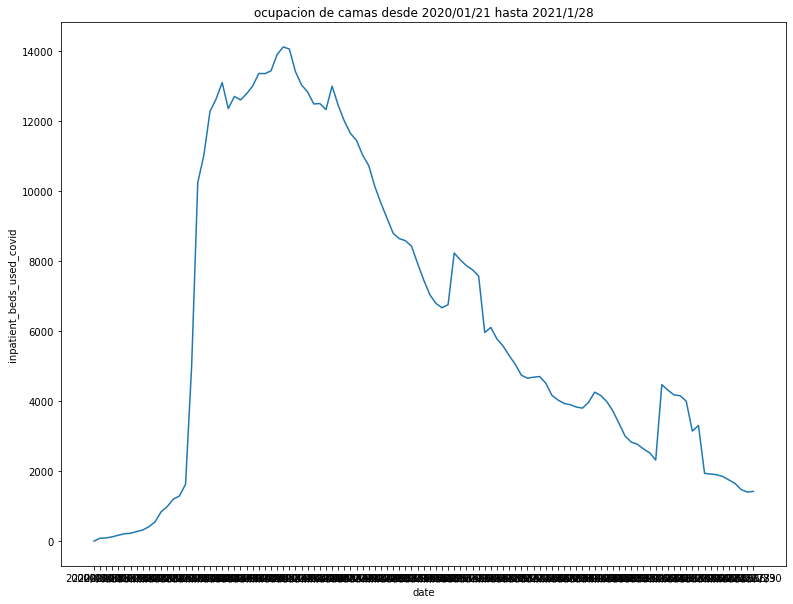

In [22]:
plt.figure(figsize = (13, 10))
sns.lineplot(x = data2.date, y = data2.inpatient_beds_used_covid)

plt.title("ocupacion de camas desde 2020/01/21 hasta 2021/1/28")

viendo la grafica durante el periodo de pandemia, vemos que hay un claro pico principal, al su izauierda el intervalo de crecimiento y a su derecha el intervalo de decrecimiento, con algunos picos menores que para este estudio voy a ignorar para simplificar el analisis

In [23]:
data2.sort_values("inpatient_beds_used_covid", inplace = True) 
#ordeno por numero de camas para ver el maximo y el minimo

In [24]:
data2

,state,date,inpatient_beds_used_covid
1054,NY,2020/03/14,6.0
1091,NY,2020/03/15,88.0
1121,NY,2020/03/16,97.0
1184,NY,2020/03/17,128.0
1234,NY,2020/03/18,174.0
...,...,...,...
2673,NY,2020/04/16,13419.0
2457,NY,2020/04/12,13443.0
2526,NY,2020/04/13,13909.0
2660,NY,2020/04/15,14067.0


In [25]:
# me quedo con el punto maximo y el punto minimo
data2_min = data2.head(1)

data2_max = data2.tail(1)

In [26]:
data2.sort_values("date", inplace = True) #ordeno por fecha otra vez

ahora que ya capture todo, graficamos otra vez marcando los puntos

2022-08-12 09:57:19.837 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-08-12 09:57:19.845 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-08-12 09:57:19.910 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-08-12 09:57:19.913 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-08-12 09:57:19.917 INFO

Text(0.5, 1.0, 'ocupacion de camas desde 2020/01/21 hasta 2021/1/28 con puntos maximos y minimos')

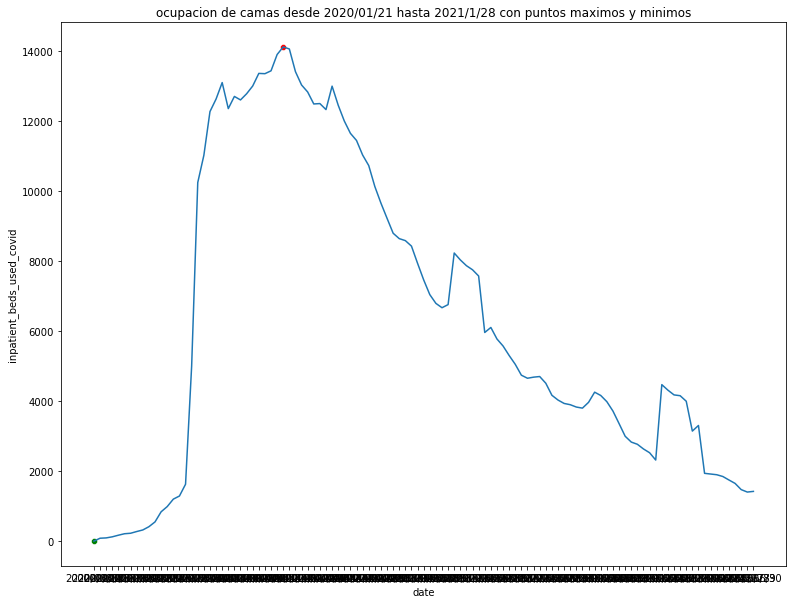

In [27]:
plt.figure(figsize = (13, 10))
sns.lineplot(x = data2.date, y = data2.inpatient_beds_used_covid)

sns.scatterplot(x = data2_min.date, y = data2_min.inpatient_beds_used_covid, color = "green")

sns.scatterplot(x = data2_max.date, y = data2_max.inpatient_beds_used_covid, color = "red")

plt.title("ocupacion de camas desde 2020/01/21 hasta 2021/1/28 con puntos maximos y minimos")

puntos criticos

vemos que la fecha minima es 2020/03/14

In [28]:
data2_min 

,state,date,inpatient_beds_used_covid
1054,NY,2020/03/14,6.0


vemos que la fecha maxima es 2020/04/14 

In [29]:
data2_max 

,state,date,inpatient_beds_used_covid
2593,NY,2020/04/14,14126.0


el intervalo de crecimiento es desde 2020/03/14 hasta 2020/04/14 (1 mes hasta el punto mas alto desde el inicio de la pandemia)

el intervalo de decrecimiento es 2020/04/14 hasta 2021/01/28

## 3 - ¿Cuáles fueron los cinco Estados que más camas UCI -Unidades de Cuidados Intensivos- utilizaron durante el año 2020? La medición debe realizarse en términos absolutos.

In [30]:
data3 = data_clean
data3

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
0,NC,2020/01/01,0,0,1,0,0,1,0.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1,HI,2020/01/01,0,0,1,0,0,1,0.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2,PR,2020/01/01,0,0,1,0,0,1,0.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
3,AL,2020/01/01,0,0,1,0,0,1,NaN,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
4,IN,2020/01/01,0,0,1,0,0,1,0.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47418,RI,2022/08/01,1,0,13,5,7,2,2.0,13,...,0.0,13,0.0,13,0.0,13,79.0,13,91.0,13
47419,MN,2022/08/01,4,1,126,20,80,31,23.0,130,...,2.0,130,0.0,130,4.0,130,77.0,130,187.0,130
47420,LA,2022/08/01,1,1,225,44,179,4,14.0,223,...,1.0,223,0.0,223,5.0,223,82.0,223,114.0,223
47421,VA,2022/08/01,9,67,23,17,62,20,49.0,96,...,1.0,91,0.0,96,6.0,96,133.0,96,178.0,96


tomo solo los datos de 2020

In [31]:
data3 = data3[data3["date"] <= "2020/12/31"]
data3

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
0,NC,2020/01/01,0,0,1,0,0,1,0.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1,HI,2020/01/01,0,0,1,0,0,1,0.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2,PR,2020/01/01,0,0,1,0,0,1,0.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
3,AL,2020/01/01,0,0,1,0,0,1,NaN,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
4,IN,2020/01/01,0,0,1,0,0,1,0.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16441,ND,2020/12/31,18,31,1,18,31,1,47.0,49,...,NaN,0,NaN,0,NaN,0,25.0,3,53.0,3
16442,NC,2020/12/31,5,123,4,6,122,4,65.0,128,...,NaN,0,NaN,0,NaN,0,0.0,27,0.0,27
16443,TX,2020/12/31,171,414,5,192,393,5,243.0,585,...,NaN,0,NaN,0,NaN,0,231.0,41,321.0,41
16444,ID,2020/12/31,5,46,1,8,43,1,5.0,51,...,NaN,0,NaN,0,NaN,0,84.0,51,229.0,51


muestro los 5 estados que mas camas ICU usaron en 2020

In [32]:
data3 = data3[["state", "date", "total_staffed_adult_icu_beds"]] #me quedo con las features de interes

data3.dropna(inplace = True) #dropeo NaN

data3.reset_index(drop = True, inplace = True) #reseteo el indice

data3.groupby("state").sum().sort_values("total_staffed_adult_icu_beds", ascending = False).head(5) 
#hago un groupby segun el estado y hago que sea acumulativa la conjucion de registros, ordeno por la feature de interes y muestro solo los 5 primeros

C:\Users\franc\AppData\Local\Temp\ipykernel_13964\3815535908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.dropna(inplace = True) #dropeo NaN


,total_staffed_adult_icu_beds
state,
CA,1228347.0
TX,1186925.0
FL,1025251.0
NY,856662.0
OH,650124.0


## 4 - ¿Qué cantidad de camas se utilizaron, por Estado, para pacientes pediátricos con COVID durante el 2020?

previous_day_admission_pediatric_covid_confirmed

In [33]:
data4 = data_clean
data4 = data4[data4["date"] <= "2020/12/31"]
data4

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
0,NC,2020/01/01,0,0,1,0,0,1,0.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1,HI,2020/01/01,0,0,1,0,0,1,0.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2,PR,2020/01/01,0,0,1,0,0,1,0.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
3,AL,2020/01/01,0,0,1,0,0,1,NaN,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
4,IN,2020/01/01,0,0,1,0,0,1,0.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16441,ND,2020/12/31,18,31,1,18,31,1,47.0,49,...,NaN,0,NaN,0,NaN,0,25.0,3,53.0,3
16442,NC,2020/12/31,5,123,4,6,122,4,65.0,128,...,NaN,0,NaN,0,NaN,0,0.0,27,0.0,27
16443,TX,2020/12/31,171,414,5,192,393,5,243.0,585,...,NaN,0,NaN,0,NaN,0,231.0,41,321.0,41
16444,ID,2020/12/31,5,46,1,8,43,1,5.0,51,...,NaN,0,NaN,0,NaN,0,84.0,51,229.0,51


In [34]:
data4 = data4[["state", "date", "previous_day_admission_pediatric_covid_confirmed"]]
data4.dropna(inplace = True)
data4.reset_index(drop = True, inplace = True)

data4

C:\Users\franc\AppData\Local\Temp\ipykernel_13964\1330276185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4.dropna(inplace = True)


,state,date,previous_day_admission_pediatric_covid_confirmed
0,NV,2020/01/02,0.0
1,NV,2020/01/03,0.0
2,AR,2020/01/04,0.0
3,NV,2020/01/04,0.0
4,AR,2020/01/05,0.0
...,...,...,...
9244,ND,2020/12/31,0.0
9245,NC,2020/12/31,6.0
9246,TX,2020/12/31,25.0
9247,ID,2020/12/31,0.0


muestro la cantidad de camas que se usaron por estado para pacientes pediatricos con COVID

In [35]:
data4.groupby("state").sum()

,previous_day_admission_pediatric_covid_confirmed
state,
AK,32.0
AL,322.0
AR,196.0
AZ,340.0
CA,1995.0
CO,411.0
CT,131.0
DC,192.0
DE,346.0


## 5 - ¿Qué porcentaje de camas UCI corresponden a casos confirmados de COVID-19? Agrupe por Estado.

adult_icu_bed_covid_utilization

In [36]:
data5 = data_clean
data5.head()

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
0,NC,2020/01/01,0,0,1,0,0,1,0.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1,HI,2020/01/01,0,0,1,0,0,1,0.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2,PR,2020/01/01,0,0,1,0,0,1,0.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
3,AL,2020/01/01,0,0,1,0,0,1,NaN,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
4,IN,2020/01/01,0,0,1,0,0,1,0.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0


In [37]:
data5 = data5[["state", "date", "adult_icu_bed_covid_utilization"]]
data5.dropna(inplace = True)

data5.groupby("state").mean()

# al ser un valor porcentual, entiendo que no tiene sentido sacar la SUMA de los porcentajes porque esta el riesgo de pasarse del 100% y deje de tener sentido
# por eso lo hago con la media (si esta mal lo cambio por .sum())

C:\Users\franc\AppData\Local\Temp\ipykernel_13964\3352754821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5.dropna(inplace = True)


,adult_icu_bed_covid_utilization
state,
AK,0.120737
AL,0.197928
AR,0.200526
AS,0.000833
AZ,0.175968
CA,0.169285
CO,0.157122
CT,0.084827
DC,0.099464


## 6 - ¿Cuántas muertes por covid hubo, por Estado, durante el año 2021?

In [38]:
data6 = data_clean
data6 = data6[["state", "date", "deaths_covid"]]
data6.dropna(inplace = True)

#me quedo con los dias de interes
data6 = data6[data6["date"] >= "2021/01/01"] #primero recorto por abajo
data6 = data6[data6["date"] <= "2021/12/31"] #ahora recorto por arriba

data6.reset_index(drop = True, inplace = True)

data6.groupby("state").sum()

# mostramos cuantas muertes por estado hubo en 2021

C:\Users\franc\AppData\Local\Temp\ipykernel_13964\1170763548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data6.dropna(inplace = True)


,deaths_covid
state,
AK,614.0
AL,6390.0
AR,3582.0
AS,0.0
AZ,16250.0
CA,35108.0
CO,2835.0
CT,2725.0
DC,532.0


ranking de cantidad de muertes por covid en el año 2021, por estado

In [39]:
data6.groupby("state").sum().sort_values("deaths_covid", ascending = False)

,deaths_covid
state,
CA,35108.0
TX,32889.0
FL,26004.0
NY,17620.0
AZ,16250.0
PA,13363.0
GA,12338.0
OH,12023.0
NC,10922.0


## 7 - ¿Qué relación presenta la falta de camas UCI disponibles con la cantidad de muertes durante el año 2021?

## 7 reformulado: ¿Que relacion presenta la falta de personal medico, con la cantidad de muertes por covid durante el año 2021?

la feature que me indica la falta de personal es "critical_staffing_shortage_today_yes", que me informa la cantidad de hospitales que reportaron tener falta de personal critica

In [40]:
data7 = data_clean[["date", "deaths_covid", "critical_staffing_shortage_today_yes"]]

data7.fillna(0, inplace = True)

# recorto segun la fecha
data7 = data7[data7["date"] >= "2021/01/01"] #primero recorto por abajo

data7 = data7[data7["date"] <= "2021/12/31"] #ahora recorto por arriba

data7

C:\Users\franc\AppData\Local\Temp\ipykernel_13964\2713546933.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data7.fillna(0, inplace = True)


,date,deaths_covid,critical_staffing_shortage_today_yes
16446,2021/01/01,180.0,159
16447,2021/01/01,26.0,2
16448,2021/01/01,103.0,8
16449,2021/01/01,2.0,0
16450,2021/01/01,2.0,4
...,...,...,...
35916,2021/12/31,47.0,14
35917,2021/12/31,20.0,42
35918,2021/12/31,41.0,34
35919,2021/12/31,5.0,0


vamos a agrupar por numero de mes para sacar el promedio de muertes y faltas de personal cada mes y asi grafico

In [41]:
from pandas import PeriodIndex

fechas = data7["date"] #capturo las fechas

idx = pd.PeriodIndex(fechas, freq = "M") #configuro para que me devuelva el numero de mes

mes = idx.month

mes #aca tengo la lista de numero de mes para cada registro, hago un merge agregando esta nueva feature

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='date', length=19475)

In [42]:
data7["month"] = mes

data7.head()

,date,deaths_covid,critical_staffing_shortage_today_yes,month
16446,2021/01/01,180.0,159,1
16447,2021/01/01,26.0,2,1
16448,2021/01/01,103.0,8,1
16449,2021/01/01,2.0,0,1
16450,2021/01/01,2.0,4,1


<AxesSubplot:xlabel='month', ylabel='deaths_covid'>

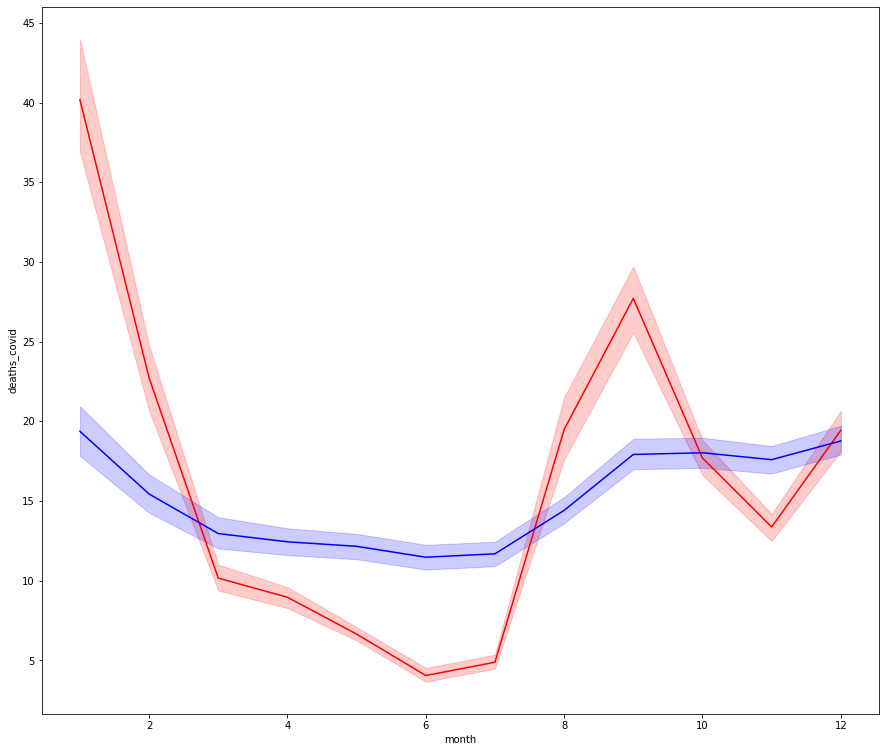

In [43]:
plt.figure(figsize = (15, 13))

sns.lineplot(x = data7.month, y = data7.deaths_covid, color = "red")

sns.lineplot(x = data7.month, y = data7.critical_staffing_shortage_today_yes, color = "blue")

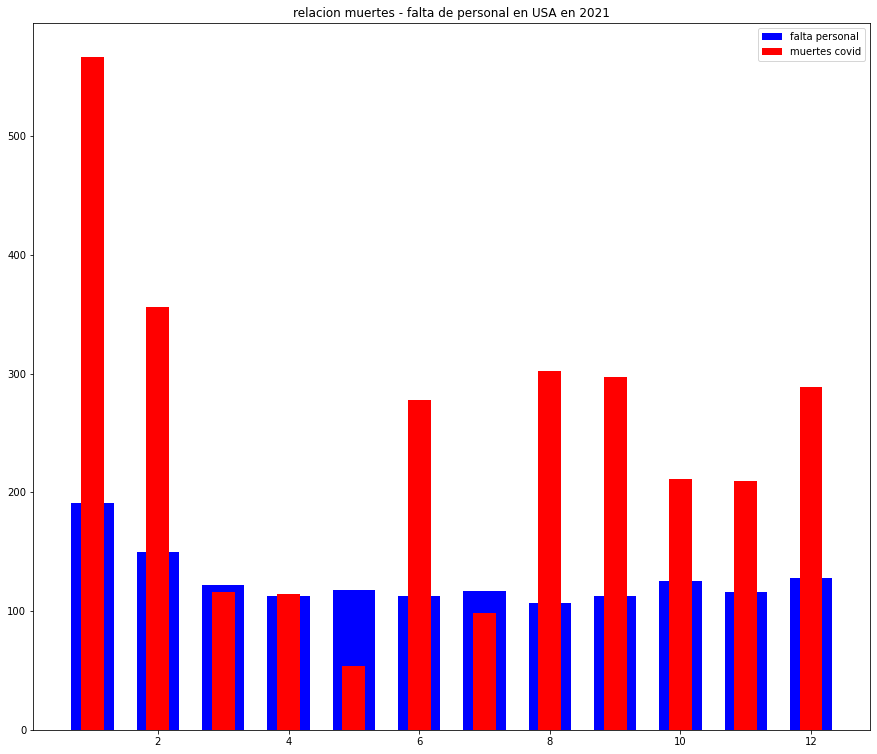

In [44]:
plt.figure(figsize = (15, 13))

plt.bar(x = data7.month, height = data7.critical_staffing_shortage_today_yes, width = 0.65, label = "falta personal", color = "blue")

plt.bar(x = data7.month, height = data7.deaths_covid, width = 0.35, label = "muertes covid", color = "red")

plt.title("relacion muertes - falta de personal en USA en 2021")

plt.legend()

lo que se puede ver en estas graficas, principalmente en el lineplot, es que, a medida que aumente la falta de personal, aumentan las muertes por COVID-19, pero si baja la falta de personal, vemos que las muertes disminuyen

no hay que dejarse engañar por las escalas, en el barplot, las barras azules muestran la cantidad de hospitales que reportaron falta de personal, entonces no es tan relacionable con la cantidad de muertes, pero se ve que una fluctuacion chica en la falta de personal resulta en una fluctuacion muy grande en la cantidad de muertes

## 8 - Siguiendo las respuestas anteriores, ¿cuál fue el peor mes de la pandemia para USA en su conjunto? Puede utilizar otras medidas que considere necesarias.

obtengo esta respuesta en base al peor mes para USA de 2021

In [45]:
data8 = data7
data8

# data8.groupby("date").sum()

,date,deaths_covid,critical_staffing_shortage_today_yes,month
16446,2021/01/01,180.0,159,1
16447,2021/01/01,26.0,2,1
16448,2021/01/01,103.0,8,1
16449,2021/01/01,2.0,0,1
16450,2021/01/01,2.0,4,1
...,...,...,...,...
35916,2021/12/31,47.0,14,12
35917,2021/12/31,20.0,42,12
35918,2021/12/31,41.0,34,12
35919,2021/12/31,5.0,0,12


vuelvo a graficar el grafico de barras del item anterior

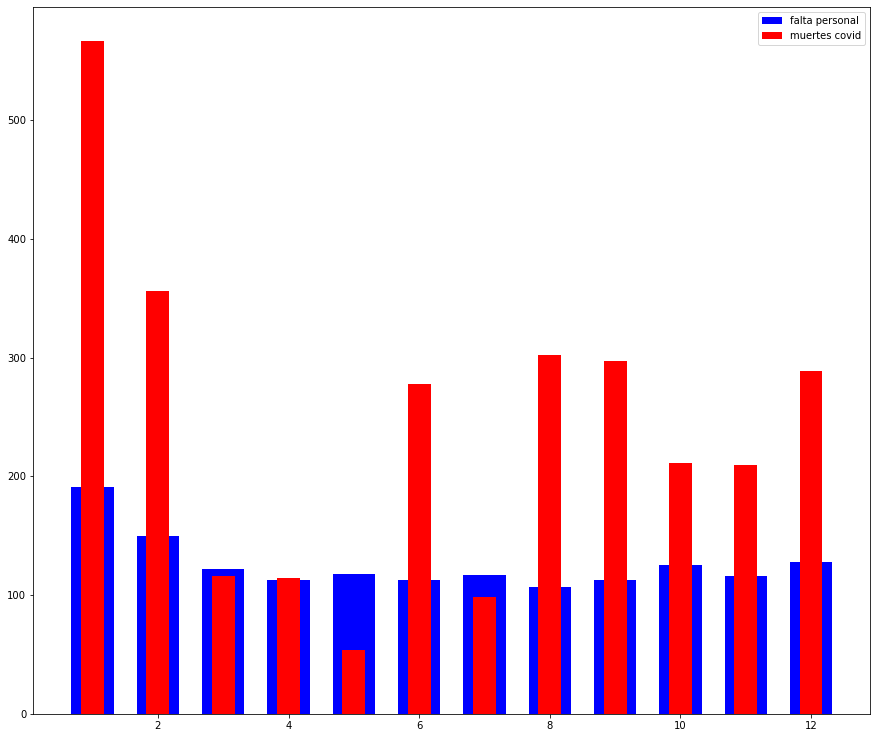

In [46]:
plt.figure(figsize = (15, 13))

plt.bar(x = data8.month, height = data8.critical_staffing_shortage_today_yes, width = 0.65, label = "falta personal", color = "blue")

plt.bar(x = data8.month, height = data8.deaths_covid, width = 0.35, label = "muertes covid", color = "red")

plt.legend()

en esta grafica vemos que el mes con mayor muertes y con mayor falta de personal fue el mes de enero en 2021, con una falta de personal mas alta que en todo el resto del año, resultando en un pico en la cantidad de muertes de ese corriente año, por lo tanto, considero que enero fue el peor mes para estados unidos en 2021

## 9 - ¿Qué recomendaciones haría, ex post, con respecto a los recursos hospitalarios y su uso?

para el año 2020 la humanidad no estaba preparada para una pandemia, lo vemos claramente ahora, que se conocen los resultados de las defunciones, falta de personal, etc, en una potencia mundial como lo es estados unidos. Con mi analisis llegue a la conclusion de que los hospitales deberian tener personal capacitado para todas las potenciales tareas en caso de que esta pandemia mundial se repita, o en su defecto, tener algun curso o plan de voluntariado en el que se puedan aprender las tareas basicas en poco tiempo, con el objetivo de reducir la falta de personal en centros medicos a la hora de encontrarse en esa situacion nuevamente

################################################################################################################################
capturo los datasets para power bi

## extraccion de datasets para Power BI

punto 1, 3, 4

In [47]:
data1_dash = data_clean[["state", "date", "inpatient_beds_used_covid"]]
data1_dash.fillna(0, inplace = True)
data1_dash.to_csv("data1_dash.csv")

C:\Users\franc\AppData\Local\Temp\ipykernel_13964\72472075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_dash.fillna(0, inplace = True)


punto 2

In [48]:
data2_dash = data_clean[["state", "date", "total_staffed_adult_icu_beds"]]
data2_dash.dropna(inplace = True) #dropeo NaN
data2_dash.reset_index(drop = True, inplace = True) #reseteo el indice

data2_dash.to_csv("data2_dash.csv")

C:\Users\franc\AppData\Local\Temp\ipykernel_13964\1238437658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2_dash.dropna(inplace = True) #dropeo NaN


In [49]:
data1_dash["state"].unique()

array(['NC', 'HI', 'PR', 'AL', 'IN', 'TX', 'LA', 'MT', 'MN', 'NV', 'AR',
       'WV', 'KS', 'CA', 'IL', 'MS', 'MO', 'OR', 'WA', 'ND', 'NE', 'IA',
       'WI', 'MI', 'ME', 'OK', 'OH', 'NJ', 'WY', 'PA', 'GA', 'MD', 'KY',
       'AZ', 'VA', 'SC', 'RI', 'CO', 'FL', 'ID', 'TN', 'NM', 'NY', 'UT',
       'VT', 'CT', 'AK', 'SD', 'DE', 'NH', 'MA', 'DC', 'VI', 'AS'],
      dtype=object)

fabrico a mano el dataset donde me indica la latitud y longitud de cada estado para agregarlo a los dataframes

In [50]:
state = ['NV', 'AR', 'RI', 'PR', 'NY', 'IA', 'NE', 'MS', 'MI', 'ME', 'MA','VI', 'MT', 'TN', 'UT', 'DC', 'PA', 'CO', 'NH', 'OH', 'OK', 'IN','NC', 'NM', 'FL', 'OR', 'VA', 'WV', 'AL', 'IL', 'VT', 'MN', 'KY','HI', 'WY', 'WI', 'SC', 'WA', 'KS', 'DE', 'LA', 'GA', 'CA', 'MO','AZ', 'SD', 'TX', 'ID', 'CT', 'NJ', 'AK', 'MD', 'ND', 'AS']

lat = ["39.876019", "34.799999", "41.742325", " 18.46633000", "40.730610", "42.032974", "41.500000", "33.000000", "44.182205", "45.367584", "42.407211", "18.343400", "46.965260", "35.860119", "39.419220", "38.895100", "41.203323", "39.113014", "44.000000", "40.367474", "36.084621", "40.273502", "35.782169", "34.307144", "27.994402", "44.000000", "37.926868", "39.000000", "32.318230", "40.000000", "44.000000", "46.392410", "37.839333", "19.741755", "43.075970", "44.500000", "33.836082", "47.751076", "38.500000", "39.000000", "30.391830", "33.247875", "36.778259", "38.573936", "34.048927", "44.500000", "31.000000", "44.068203", "41.599998", "39.833851", "66.160507", "39.045753", "47.650589", "-14.3064"]

long = ["-117.224121", "-92.199997", "-71.742332", "-66.10572000", "-73.935242", "-93.581543", "-100.000000", "-90.000000", "-84.506836", "-68.972168", "-71.382439", "-64.867200", "-109.533691", "-86.660156", "-111.950684", "-77.036400", "-77.194527", "-105.358887", "-71.500000", "-82.996216", "-96.921387", "-86.126976", "-80.793457", "-106.018066", "-81.760254", "-120.500000", "-78.024902", "-80.500000", "-86.902298", "-89.000000", "-72.699997", "-94.636230", "-84.270020", "-155.844437", "-107.290283", "-89.500000", "-81.163727", "-120.740135", "-98.000000", "-75.500000", "-92.329102", "-83.441162", "-119.417931", "-92.603760", " -111.093735", "-100.000000", "-100.000000", "-114.742043", "-72.699997", "-74.871826", "-153.369141", "-76.641273", "-100.437012", "-170.6950"]

In [51]:
location = pd.DataFrame( list(zip(state, lat, long)), columns = ["state", "latitude", "longitude"])

location.head() #tabla de coordenadas para cada estado

,state,latitude,longitude
0,NV,39.876019,-117.224121
1,AR,34.799999,-92.199997
2,RI,41.742325,-71.742332
3,PR,18.46633000,-66.10572000
4,NY,40.730610,-73.935242


In [52]:
data1_dash = pd.merge(data1_dash, location, on = "state")

In [53]:
data1_dash.head()

,state,date,inpatient_beds_used_covid,latitude,longitude
0,NC,2020/01/01,0.0,35.782169,-80.793457
1,NC,2020/01/02,0.0,35.782169,-80.793457
2,NC,2020/01/03,0.0,35.782169,-80.793457
3,NC,2020/01/04,0.0,35.782169,-80.793457
4,NC,2020/01/05,0.0,35.782169,-80.793457


In [54]:
data1_dash.to_csv("data1_dash.csv") #convierto a .csv con las coordenadas

In [55]:
location.to_csv("location.csv")

In [56]:
# preparo toda la data para mostrar las defunciones por estado en 2021
data6_dash = data_clean
data6_dash = data6_dash[["state", "date", "deaths_covid"]]
data6_dash.dropna(inplace = True)

#me quedo con los dias de interes
data6_dash = data6_dash[data6_dash["date"] >= "2021/01/01"] #primero recorto por abajo
data6_dash = data6_dash[data6_dash["date"] <= "2021/12/31"] #ahora recorto por arriba

data6_dash.reset_index(drop = True, inplace = True)

# data6_dash

data6_dash.to_csv("data6_dash.csv")

C:\Users\franc\AppData\Local\Temp\ipykernel_13964\3482549254.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data6_dash.dropna(inplace = True)


In [57]:
data7_dash = data7
data7_dash.to_csv("data7_dash.csv")